In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from adjustText import adjust_text

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
#Drop NAN values from salary year avg column to accurate the visualization
df_da_us = df_da_us.dropna(subset='salary_year_avg')

In [ ]:
df_da_us = df_da_us.explode('job_skills') #It turns list values into multiple rows.
df_da_us[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint
410,133285.0,sql
410,133285.0,word
410,133285.0,excel
410,133285.0,visio


In [ ]:
#Groups the data by each skill and calculates how many job postings mention the skill and the median salary for that skill.
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
#Sorts skills by highest median salary and selects the top 10 highest-paying skills.
df_da_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)
#Finds the 10 most demanded skills and then sorts them by highest median salary among those skills.
df_da_skill = df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

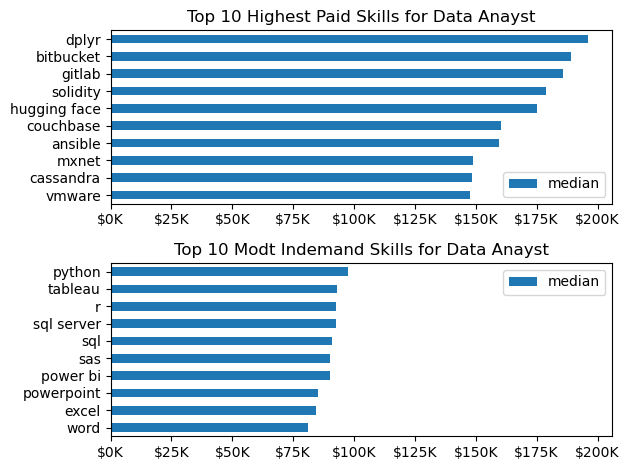

In [ ]:
fig, ax = plt.subplots(2, 1)#Creates one figure with 2 vertical subplot axes for two separate charts.

df_da_pay[::-1].plot(kind='barh', y='median', ax=ax[0])#Plots a horizontal bar chart of median salary for top paying skills on the first subplot in reverse order for better visual ranking.
ax[0].set_title('Top 10 Highest Paid Skills for Data Anayst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_da_skill[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())#Makes the second chart use the same x-axis salary range as the first chart for fair comparison.
ax[1].set_title('Top 10 Modt Indemand Skills for Data Anayst')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()